In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from utils import utils, config

In [2]:
df, df_cv = utils.Utils.load_data(drop_neutral=True)

In [3]:
nltk_rf_w2v_model_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_w2v_svc_1"
)

In [4]:
# nltk_rf_w2v_model_1.fit(False)
# nltk_rf_w2v_model_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  20.5s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Classification Report for nltk_rf_w2v_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.76      0.87      0.81       129
    positive       0.90      0.81      0.85       181

    accuracy                           0.83       310
   macro avg       0.83      0.84      0.83       310
weighted avg       0.84      0.83      0.83       310

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.53      0.76      0.62       348
    positive       0.78      0.55      0.64       528

    accuracy                           0.63       876
   macro avg       0.65      0.66      0.63       876
weighted avg       0.68      0.63      0.64       876



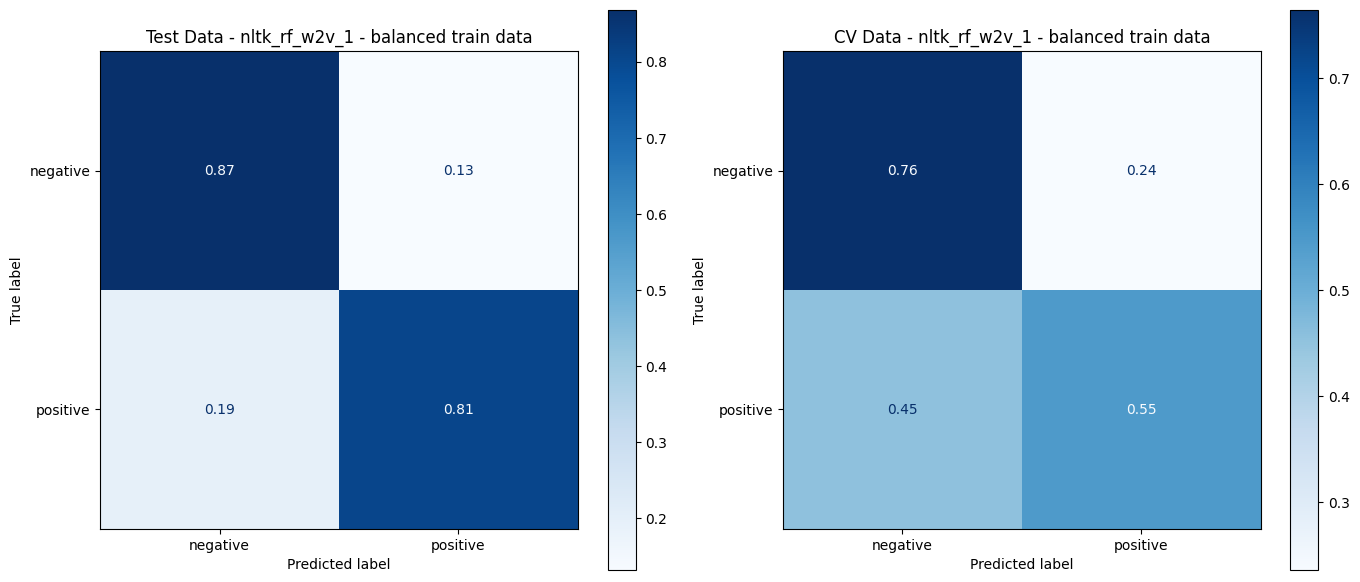

In [5]:
nltk_rf_w2v_model_1.fit(True)
nltk_rf_w2v_model_1.evaluate(True)

In [6]:
nltk_rf_w2v_model_1.dump(config.MODEL_DIR)

In [7]:
nltk_rf_w2v_model_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_w2v_svc_2"
)

In [8]:
# nltk_rf_w2v_model_2.fit(False)
# nltk_rf_w2v_model_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  30.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Classification Report for nltk_rf_w2v_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.75      0.87      0.80       129
    positive       0.89      0.79      0.84       181

    accuracy                           0.82       310
   macro avg       0.82      0.83      0.82       310
weighted avg       0.83      0.82      0.82       310

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.55      0.71      0.62       348
    positive       0.76      0.61      0.68       528

    accuracy                           0.65       876
   macro avg       0.66      0.66      0.65       876
weighted avg       0.68      0.65      0.66       876



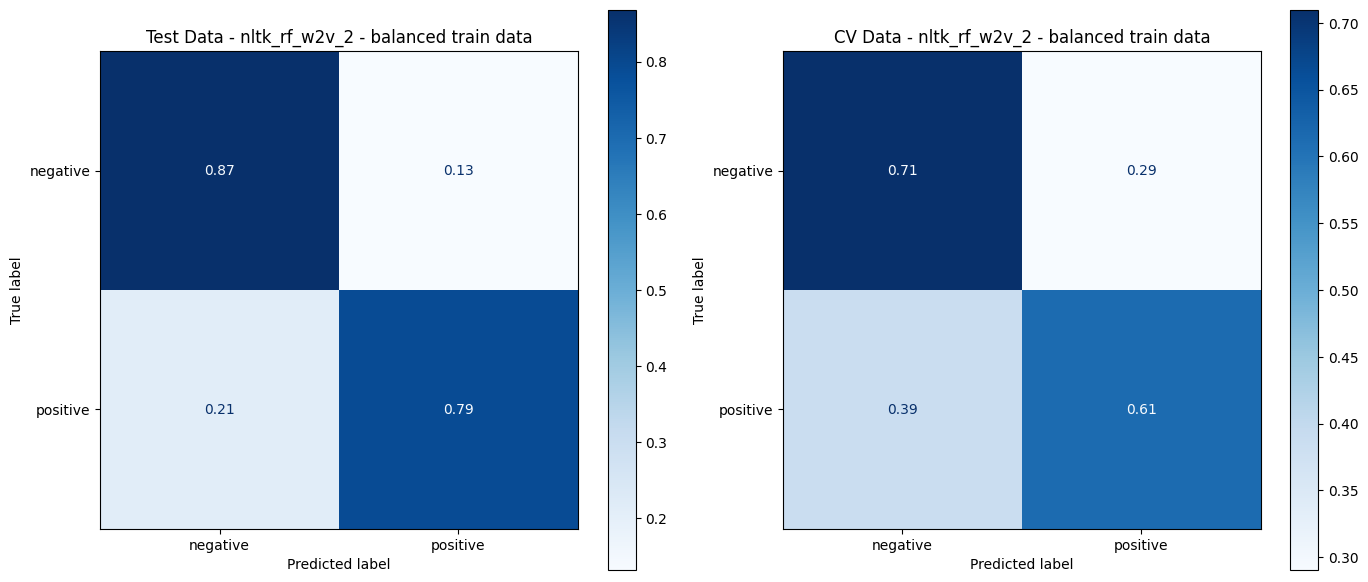

In [9]:
nltk_rf_w2v_model_2.fit(True)
nltk_rf_w2v_model_2.evaluate(True)

In [10]:
nltk_rf_w2v_model_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=True, remove_urls=True)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_w2v_svc_3"
)

In [11]:
# nltk_rf_w2v_model_3.fit(False)
# nltk_rf_w2v_model_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  44.7s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Classification Report for nltk_rf_w2v_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.79      0.84      0.82       129
    positive       0.88      0.84      0.86       181

    accuracy                           0.84       310
   macro avg       0.84      0.84      0.84       310
weighted avg       0.84      0.84      0.84       310

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.57      0.70      0.63       348
    positive       0.77      0.66      0.71       528

    accuracy                           0.67       876
   macro avg       0.67      0.68      0.67       876
weighted avg       0.69      0.67      0.67       876



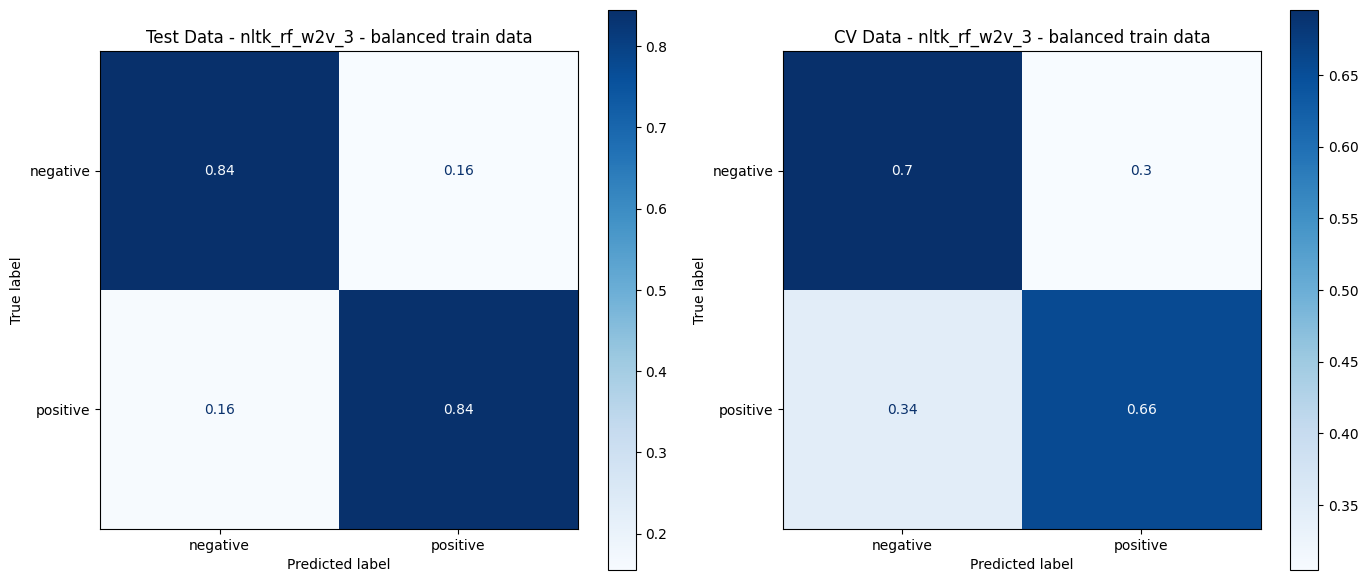

In [12]:
nltk_rf_w2v_model_3.fit(True)
nltk_rf_w2v_model_3.evaluate(True)

In [13]:
nltk_rf_w2v_model_3.dump(config.MODEL_DIR)